**Author: Rameshwar L Kumawat, Georgia Tech**

ML models for non-covalent interaction energies at different level of theories.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jax.numpy as jnp
import jax
from jax.example_libraries import optimizers
import sklearn.manifold, sklearn.cluster
import rdkit, rdkit.Chem, rdkit.Chem.Draw

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge

In [ ]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 1.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

desc_test_non.csv   desc_train_non.hdf5  nenci2021_spreadsheet-rammodified.csv
desc_test_non.hdf5  desc_valid_non.csv	 nenci2022_spreadsheet.csv
desc_train_non.csv  desc_valid_non.hdf5


In [ ]:
soldata = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/nenci2022_spreadsheet.csv')
soldata.head()

,Unique ID,ID,Monomer 1,Monomer 2,Orientation,Rot ID,Axis,Angle,Dist.,CCSDTCBS,...,MP2aTZ,MP2aQZ,HFhaTZ,HFaTZ,HFaQZ,SAPT2aDZElst,SAPT2aDZExch,SAPT2aDZInd,SAPT2aDZDisp,SAPT2aDZTot
0,1,1,Water,Water,NaN,NaN,NaN,NaN,0.70,4.55960,...,5.07015,4.60507,8.23450,8.20008,8.16646,-26.40563,52.82008,-14.36712,-6.80236,5.24496
1,2,1,Water,Water,NaN,NaN,NaN,NaN,0.80,-2.37310,...,-1.96771,-2.27417,0.23879,0.21473,0.18607,-16.59552,26.66512,-7.23598,-4.41700,-1.58339
2,3,1,Water,Water,NaN,NaN,NaN,NaN,0.90,-4.64641,...,-4.31722,-4.53335,-2.83886,-2.85023,-2.88849,-10.78194,13.33984,-3.75702,-2.90041,-4.09954
3,4,1,Water,Water,NaN,NaN,NaN,NaN,0.95,-4.94136,...,-4.65147,-4.83210,-3.45357,-3.45927,-3.49756,-8.83284,9.40502,-2.73480,-2.35499,-4.51761
4,5,1,Water,Water,NaN,NaN,NaN,NaN,1.00,-4.93911,...,-4.68999,-4.83812,-3.72461,-3.72552,-3.75953,-7.32063,6.61652,-2.00414,-1.91675,-4.62501


In [ ]:
len(soldata)

7763

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


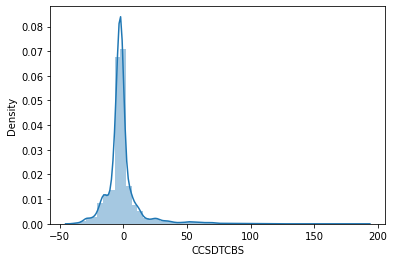

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


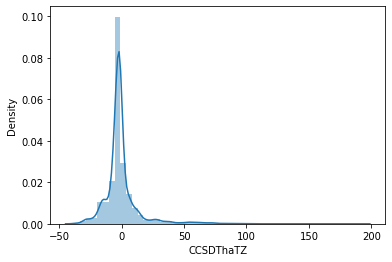

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


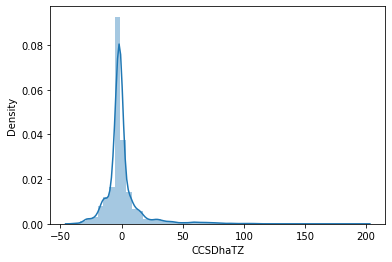

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


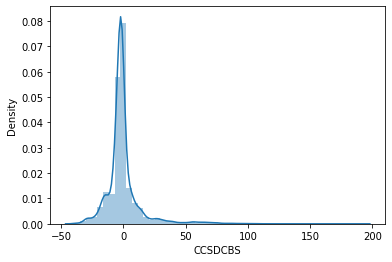

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


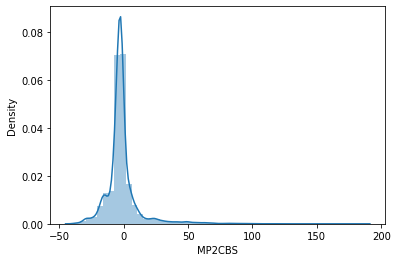

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


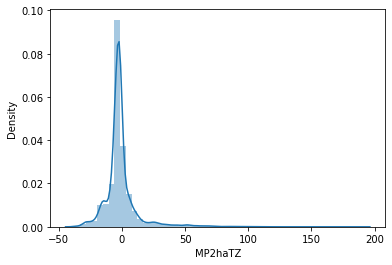

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


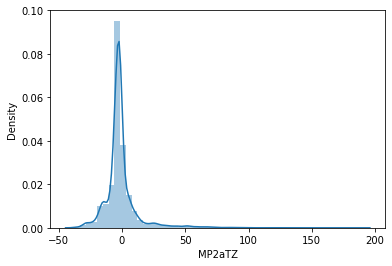

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


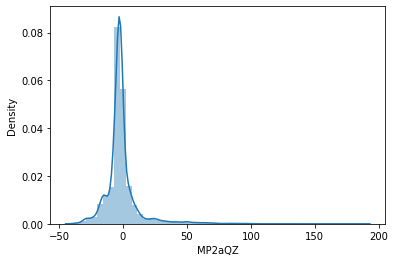

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


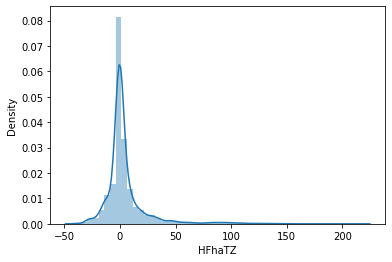

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


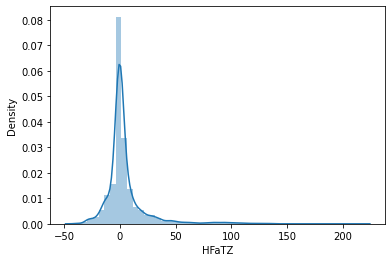

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


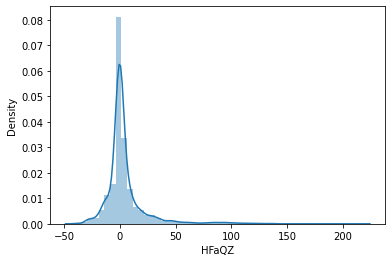

In [ ]:
#sns.kdeplot(CCSDTCBS, shade=True, cut=0)
sns.distplot(soldata.CCSDTCBS)
plt.show()
sns.distplot(soldata.CCSDThaTZ)
plt.show()
sns.distplot(soldata.CCSDhaTZ)
plt.show()
sns.distplot(soldata.CCSDCBS)
plt.show()
sns.distplot(soldata.MP2CBS)
plt.show()
sns.distplot(soldata.MP2haTZ)
plt.show()
sns.distplot(soldata.MP2aTZ)
plt.show()
sns.distplot(soldata.MP2aQZ)
plt.show()
sns.distplot(soldata.HFhaTZ)
plt.show()
sns.distplot(soldata.HFaTZ)
plt.show()
sns.distplot(soldata.HFaQZ)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


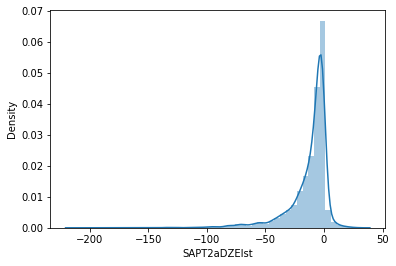

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


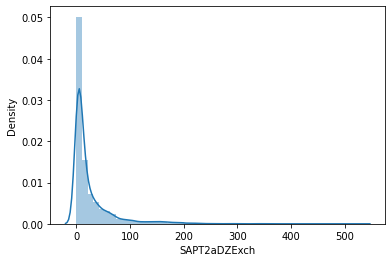

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


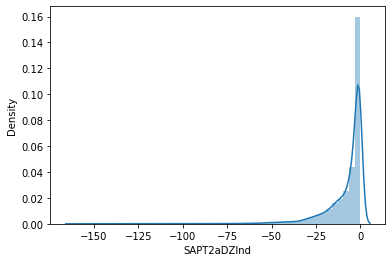

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


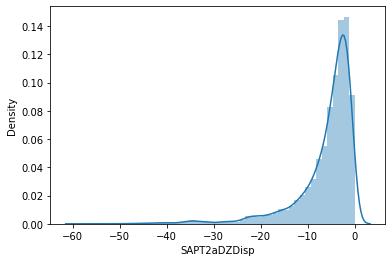

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


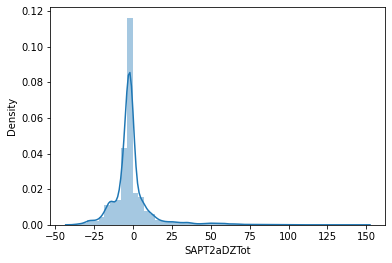

In [ ]:
sns.distplot(soldata.SAPT2aDZElst)
plt.show()
sns.distplot(soldata.SAPT2aDZExch)
plt.show()
sns.distplot(soldata.SAPT2aDZInd)
plt.show()
sns.distplot(soldata.SAPT2aDZDisp)
plt.show()
sns.distplot(soldata.SAPT2aDZTot)
plt.show()

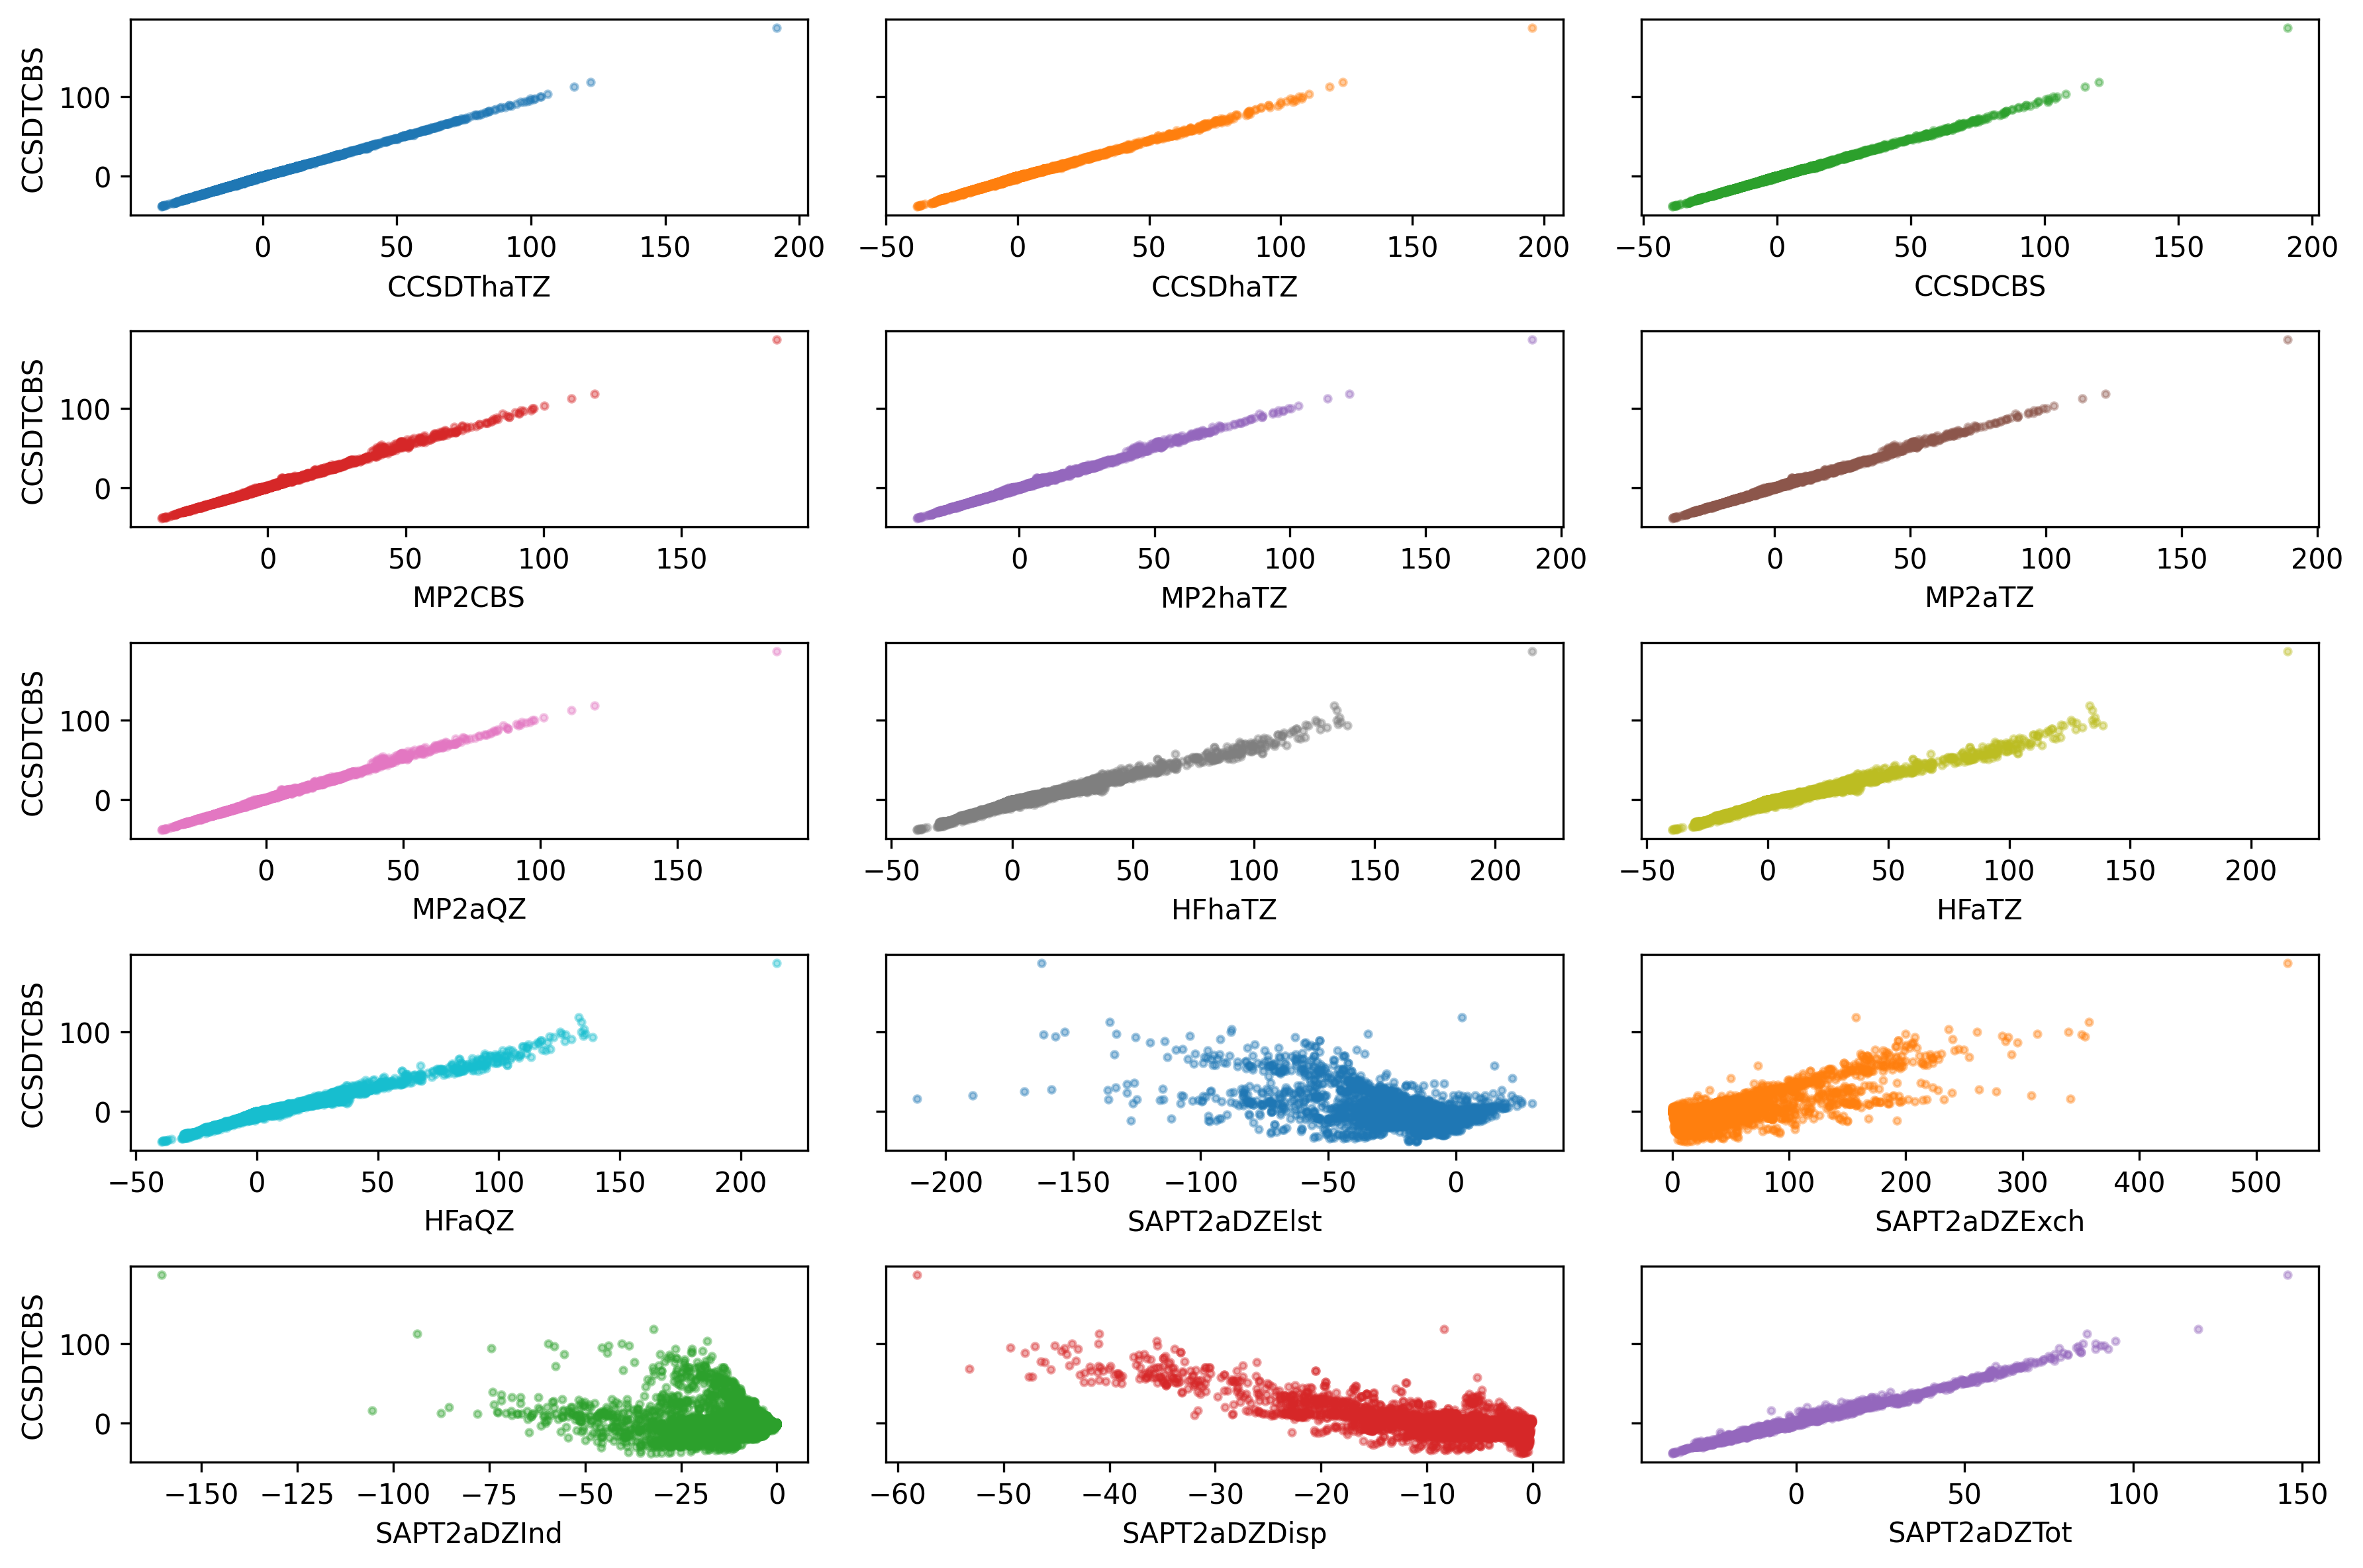

In [ ]:
features_start_at = list(soldata.columns).index("CCSDThaTZ")
feature_names = soldata.columns[features_start_at:]

fig, axs = plt.subplots(nrows=5, ncols=3, sharey=True, figsize=(12, 8), dpi=300)
axs = axs.flatten()  # so we don't have to slice by row and column
for i, n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        soldata[n], soldata.CCSDTCBS, s=6, alpha=0.4, color=f"C{i}"
    )  # add some color
    if i % 3 == 0:
        ax.set_ylabel("CCSDTCBS")
    ax.set_xlabel(n)
# hide empty subplots
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

In [ ]:
def linear_model(x, w, b):
    return jnp.dot(x, w) + b


# test it out
x = np.array([1, 0, 2.5])
w = np.array([0.2, -0.5, 0.4])
b = 4.3

linear_model(x, w, b)

DeviceArray(5.5, dtype=float32)

In [ ]:
# convert data into features, labels
features = soldata.loc[:, feature_names].values
labels = soldata.CCSDTCBS.values

feature_dim = features.shape[1]

# initialize our paramaters
w = np.random.normal(size=feature_dim)
b = 0.0

# define loss
def loss(y, labels):
    return jnp.mean((y - labels) ** 2)


# test it out
y = linear_model(features, w, b)
loss(y, labels)

DeviceArray(9908.806, dtype=float32)

In [ ]:
# compute gradients
def loss_wrapper(w, b, data):
    features = data[0]
    labels = data[1]
    y = linear_model(features, w, b)
    return loss(y, labels)


loss_grad = jax.grad(loss_wrapper, (0, 1))

# test it out
loss_grad(w, b, (features, labels))

(DeviceArray([ 1994.242 ,  2196.1245,  2043.8741,  1662.3121,  1814.5682,
               1801.8298,  1718.4965,  3239.413 ,  3238.365 ,  3232.031 ,
              -3920.648 ,  9192.952 , -1902.7822, -1682.0562,  1687.467 ],            dtype=float32),
 DeviceArray(105.87131, dtype=float32, weak_type=True))

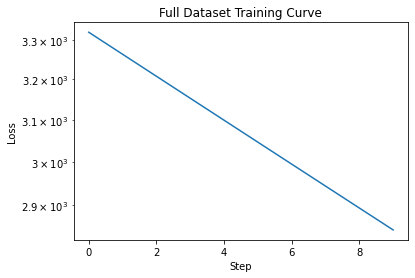

In [ ]:
loss_progress = []
eta = 1e-6
data = (features, labels)
for i in range(10):
    grad = loss_grad(w, b, data)
    w -= eta * grad[0]
    b -= eta * grad[1]
    loss_progress.append(loss_wrapper(w, b, data))
plt.plot(loss_progress)

plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.title("Full Dataset Training Curve")
plt.show()

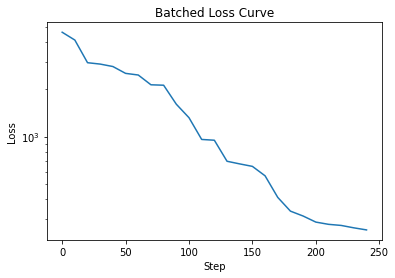

In [ ]:
# initialize our paramaters
# to be fair to previous method
w = np.random.normal(size=feature_dim)
b = 0.0

loss_progress = []
eta = 1e-6
batch_size = 32
N = len(labels)  # number of data points
data = (features, labels)
# compute how much data fits nicely into a batch
# and drop extra data
new_N = len(labels) // batch_size * batch_size

# the -1 means that numpy will compute
# what that dimension should be
batched_features = features[:new_N].reshape((-1, batch_size, feature_dim))
batched_labels = labels[:new_N].reshape((-1, batch_size))
# to make it random, we'll iterate over the batches randomly
indices = np.arange(new_N // batch_size)
np.random.shuffle(indices)
for i in indices:
    # choose a random set of
    # indices to slice our data
    grad = loss_grad(w, b, (batched_features[i], batched_labels[i]))
    w -= eta * grad[0]
    b -= eta * grad[1]
    # we still compute loss on whole dataset, but not every step
    if i % 10 == 0:
        loss_progress.append(loss_wrapper(w, b, data))

plt.plot(np.arange(len(loss_progress)) * 10, loss_progress)
plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.title("Batched Loss Curve")
plt.show()

In [ ]:
fstd = np.std(features, axis=0)
fmean = np.mean(features, axis=0)
std_features = (features - fmean) / fstd

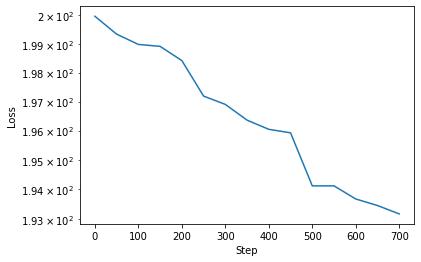

In [ ]:
# initialize our paramaters
# since we're changing the features
w = np.random.normal(scale=0.1, size=feature_dim)
b = 0.0


loss_progress = []
eta = 1e-6
batch_size = 32
N = len(labels)  # number of data points
data = (std_features, labels)
# compute how much data fits nicely into a batch
# and drop extra data
new_N = len(labels) // batch_size * batch_size
num_epochs = 3

# the -1 means that numpy will compute
# what that dimension should be
batched_features = std_features[:new_N].reshape((-1, batch_size, feature_dim))
batched_labels = labels[:new_N].reshape((-1, batch_size))
indices = np.arange(new_N // batch_size)

# iterate through the dataset 3 times
for epoch in range(num_epochs):
    # to make it random, we'll iterate over the batches randomly
    np.random.shuffle(indices)
    for i in indices:
        # choose a random set of
        # indices to slice our data
        grad = loss_grad(w, b, (batched_features[i], batched_labels[i]))
        w -= eta * grad[0]
        b -= eta * grad[1]
        # we still compute loss on whole dataset, but not every step
        if i % 50 == 0:
            loss_progress.append(loss_wrapper(w, b, data))

plt.plot(np.arange(len(loss_progress)) * 50, loss_progress)
plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.show()

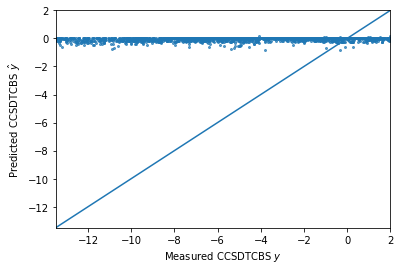

In [ ]:
predicted_labels = linear_model(std_features, w, b)

plt.plot([-100, 100], [-100, 100])
plt.scatter(labels, predicted_labels, s=4, alpha=0.7)
plt.xlabel("Measured CCSDTCBS $y$")
plt.ylabel("Predicted CCSDTCBS $\hat{y}$")
plt.xlim(-13.5, 2)
plt.ylim(-13.5, 2)
plt.show()

In [ ]:
# slice correlation between predict/labels
# from correlation matrix
np.corrcoef(labels, predicted_labels)[0, 1]

0.25800560338830486

# Unsupervised ML

In [ ]:
# get down to 2 dimensions for easy visuals
embedding = sklearn.manifold.Isomap(n_components=2)
# only fit to every 25th point to make it fast
embedding.fit(std_features[::25, :])
reduced_features = embedding.transform(std_features)

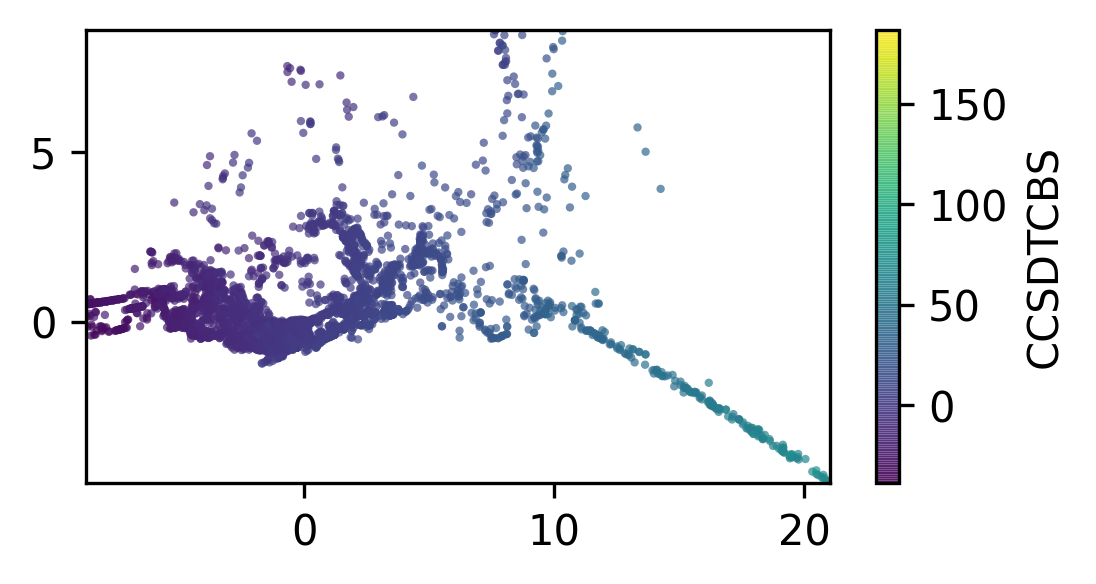

In [ ]:
xlow, xhi = np.quantile(reduced_features, [0.005, 0.995], axis=0)

plt.figure(figsize=(4, 2), dpi=300)
plt.scatter(
    reduced_features[:, 0],
    reduced_features[:, 1],
    s=4,
    alpha=0.7,
    c=labels,
    edgecolors="none",
)
plt.xlim(xlow[0], xhi[0])
plt.ylim(xlow[1], xhi[1])
cb = plt.colorbar()
cb.set_label("CCSDTCBS")
plt.show()

In [ ]:
# cluster - using whole features
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0)
kmeans.fit(std_features)

KMeans(n_clusters=4, random_state=0)

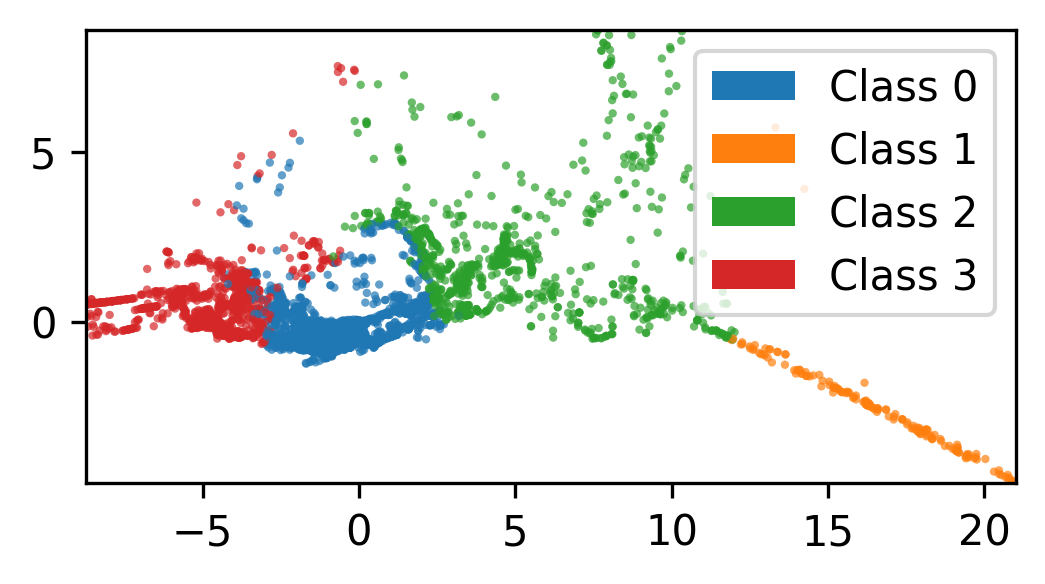

In [ ]:
plt.figure(figsize=(4, 2), dpi=300)
point_colors = [f"C{i}" for i in kmeans.labels_]
plt.scatter(
    reduced_features[:, 0],
    reduced_features[:, 1],
    s=4,
    alpha=0.7,
    c=point_colors,
    edgecolors="none",
)
# make legend
legend_elements = [
    plt.matplotlib.patches.Patch(
        facecolor=f"C{i}", edgecolor="none", label=f"Class {i}"
    )
    for i in range(4)
]
plt.legend(handles=legend_elements)
plt.xlim(xlow[0], xhi[0])
plt.ylim(xlow[1], xhi[1])
plt.show()

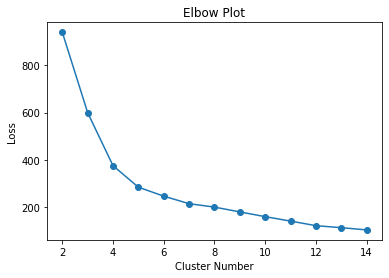

In [ ]:
# make an elbow plot
loss = []
cn = range(2, 15)
for i in cn:
    kmeans = sklearn.cluster.KMeans(n_clusters=i, random_state=0)
    # use every 50th point
    kmeans.fit(std_features[::50])
    # we get score -> opposite of loss
    # so take -
    loss.append(-kmeans.score(std_features[::50]))

plt.plot(cn, loss, "o-")
plt.xlabel("Cluster Number")
plt.ylabel("Loss")
plt.title("Elbow Plot")
plt.show()

# Regression and Model Assesement

In [ ]:
features_start_at = list(soldata.columns).index("CCSDTCBS")
feature_names = soldata.columns[features_start_at:]

In [ ]:
# Get 50 points and split into train/test
sample = soldata.sample(50, replace=False)
train = sample[:25]
test = sample[25:]

# standardize the features using only train
test[feature_names] -= train[feature_names].mean()
test[feature_names] /= train[feature_names].std()
train[feature_names] -= train[feature_names].mean()
train[feature_names] /= train[feature_names].std()

# convert from pandas dataframe to numpy arrays
x = train[feature_names].values
y = train["CCSDTCBS"].values
test_x = test[feature_names].values
test_y = test["CCSDTCBS"].values

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# define our loss function
@jax.jit
def loss(w, b, x, y):
    return jnp.mean((y - jnp.dot(x, w) - b) ** 2)


loss_grad = jax.grad(loss, (0, 1))
w = np.random.normal(size=x.shape[1])
b = 0.0
loss_grad(w, b, x, y)

(DeviceArray([-8.776231  , -8.6304245 , -8.46973   , -8.618245  ,
              -8.786729  , -8.638812  , -8.640323  , -8.731193  ,
              -7.732962  , -7.7340164 , -7.7445946 , -2.1512973 ,
              -0.87372357, -2.8622348 , -0.56807834, -9.000301  ],            dtype=float32),
 DeviceArray(-5.7713596e-08, dtype=float32, weak_type=True))

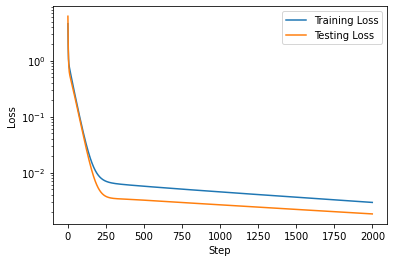

In [ ]:
loss_progress = []
test_loss_progress = []
eta = 0.05
for i in range(2000):
    grad = loss_grad(w, b, x, y)
    w -= eta * grad[0]
    b -= eta * grad[1]
    loss_progress.append(loss(w, b, x, y))
    test_loss_progress.append(loss(w, b, test_x, test_y))
plt.plot(loss_progress, label="Training Loss")
plt.plot(test_loss_progress, label="Testing Loss")

plt.xlabel("Step")
plt.yscale("log")
plt.legend()
plt.ylabel("Loss")
plt.show()

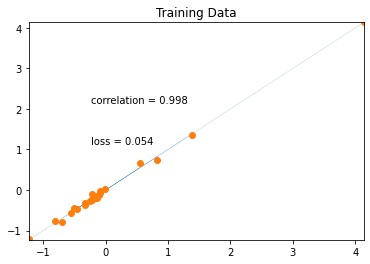

In [ ]:
yhat = x @ w + b
plt.plot(y, y, ":", linewidth=0.2)
plt.plot(y, x @ w + b, "o")
plt.xlim(min(y), max(y))
plt.ylim(min(y), max(y))
plt.text(min(y) + 1, max(y) - 2, f"correlation = {np.corrcoef(y, yhat)[0,1]:.3f}")
plt.text(min(y) + 1, max(y) - 3, f"loss = {np.sqrt(np.mean((y - yhat)**2)):.3f}")
plt.title("Training Data")
plt.show()

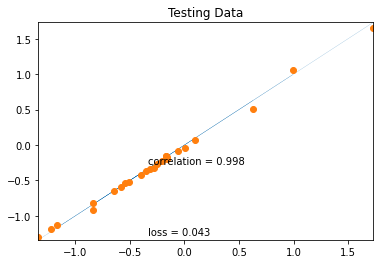

In [ ]:
yhat = test_x @ w + b
plt.plot(test_y, test_y, ":", linewidth=0.2)
plt.plot(test_y, yhat, "o")
plt.xlim(min(test_y), max(test_y))
plt.ylim(min(test_y), max(test_y))
plt.text(
    min(test_y) + 1,
    max(test_y) - 2,
    f"correlation = {np.corrcoef(test_y, yhat)[0,1]:.3f}",
)
plt.text(
    min(test_y) + 1,
    max(test_y) - 3,
    f"loss = {np.sqrt(np.mean((test_y - yhat)**2)):.3f}",
)
plt.title("Testing Data")
plt.show()

In [ ]:
# generate data from polynomial
N = 20
syn_x = np.linspace(-3, 3, N)
# create feature matrix
syn_features = np.vstack([syn_x**3, syn_x**2, syn_x, np.ones_like(syn_x)]).T
syn_labels = syn_x**3 - syn_x**2 + syn_x - 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


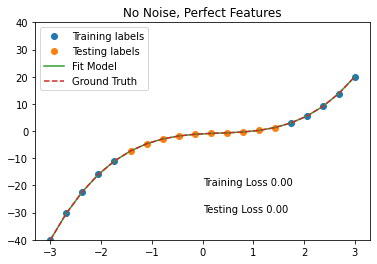

In [ ]:
# split data into train/test
indices = list(range(0, N // 4)) + list(range(3 * N // 4, N))
test_indices = list(range(N // 4, 3 * N // 4))
train_x = syn_features[indices]
train_y = syn_labels[indices]
test_x = syn_features[test_indices]
test_y = syn_labels[test_indices]

# fit using numpy least squares method.
w, *_ = np.linalg.lstsq(train_x, train_y)

# plotting code
plt.plot(syn_x[indices], train_y, "o", label="Training labels")
plt.plot(syn_x[test_indices], test_y, "o", label="Testing labels")
plt.ylim(-40, 40)
plt.plot(syn_x, jnp.dot(syn_features, w), label="Fit Model")
plt.plot(syn_x, syn_labels, "--", label="Ground Truth")
plt.text(0, -20, f"Training Loss {loss(w,0,train_x, train_y):.2f}")
plt.text(0, -30, f"Testing Loss {loss(w,0, test_x, test_y):.2f}")
plt.legend()
plt.title("No Noise, Perfect Features")
plt.show()

In [ ]:
train_y = train_y + np.random.normal(scale=5, size=train_y.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


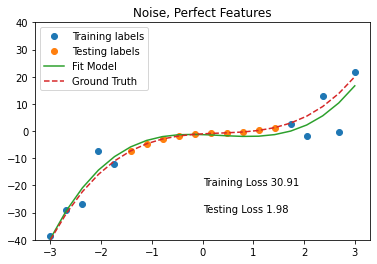

In [ ]:
w, *_ = np.linalg.lstsq(train_x, train_y)
plt.plot(syn_x[indices], train_y, "o", label="Training labels")
plt.plot(syn_x[test_indices], test_y, "o", label="Testing labels")
plt.ylim(-40, 40)
plt.plot(syn_x, jnp.dot(syn_features, w), label="Fit Model")
plt.plot(syn_x, syn_labels, "--", label="Ground Truth")
plt.text(0, -20, f"Training Loss {loss(w,0,train_x, train_y):.2f}")
plt.text(0, -30, f"Testing Loss {loss(w,0, test_x, test_y):.2f}")
plt.legend()
plt.title("Noise, Perfect Features")
plt.show()

In [ ]:
syn_features = np.vstack([syn_x**i for i in range(7)]).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


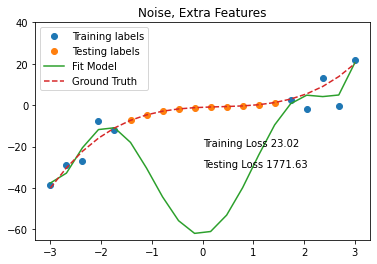

In [ ]:
train_x = syn_features[indices]
test_x = syn_features[test_indices]
test_y = syn_labels[test_indices]

w, *_ = np.linalg.lstsq(train_x, train_y)
plt.plot(syn_x[indices], train_y, "o", label="Training labels")
plt.plot(syn_x[test_indices], test_y, "o", label="Testing labels")
plt.ylim(-65, 40)
plt.plot(syn_x, jnp.dot(syn_features, w), label="Fit Model")
plt.plot(syn_x, syn_labels, "--", label="Ground Truth")
plt.text(0, -20, f"Training Loss {loss(w,0,train_x, train_y):.2f}")
plt.text(0, -30, f"Testing Loss {loss(w,0, test_x, test_y):.2f}")
plt.legend(loc="upper left")
plt.title("Noise, Extra Features")
plt.show()

In [ ]:
syn_features = np.vstack(
    [syn_x**2, syn_x, np.exp(-(syn_x**2)), np.cos(syn_x), np.ones_like(syn_x)]
).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


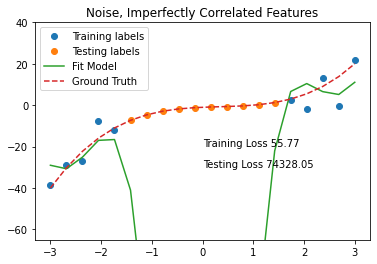

In [ ]:
train_x = syn_features[indices]
test_x = syn_features[test_indices]

w, *_ = np.linalg.lstsq(train_x, train_y)
plt.plot(syn_x[indices], train_y, "o", label="Training labels")
plt.plot(syn_x[test_indices], test_y, "o", label="Testing labels")
plt.ylim(-65, 40)
plt.plot(syn_x, jnp.dot(syn_features, w), label="Fit Model")
plt.plot(syn_x, syn_labels, "--", label="Ground Truth")
plt.text(0, -20, f"Training Loss {loss(w,0,train_x, train_y):.2f}")
plt.text(0, -30, f"Testing Loss {loss(w,0, test_x, test_y):.2f}")
plt.legend(loc="upper left")
plt.title("Noise, Imperfectly Correlated Features")
plt.show()